# Importing the dataset

In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Data Preprocessing

In [5]:
#finding missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

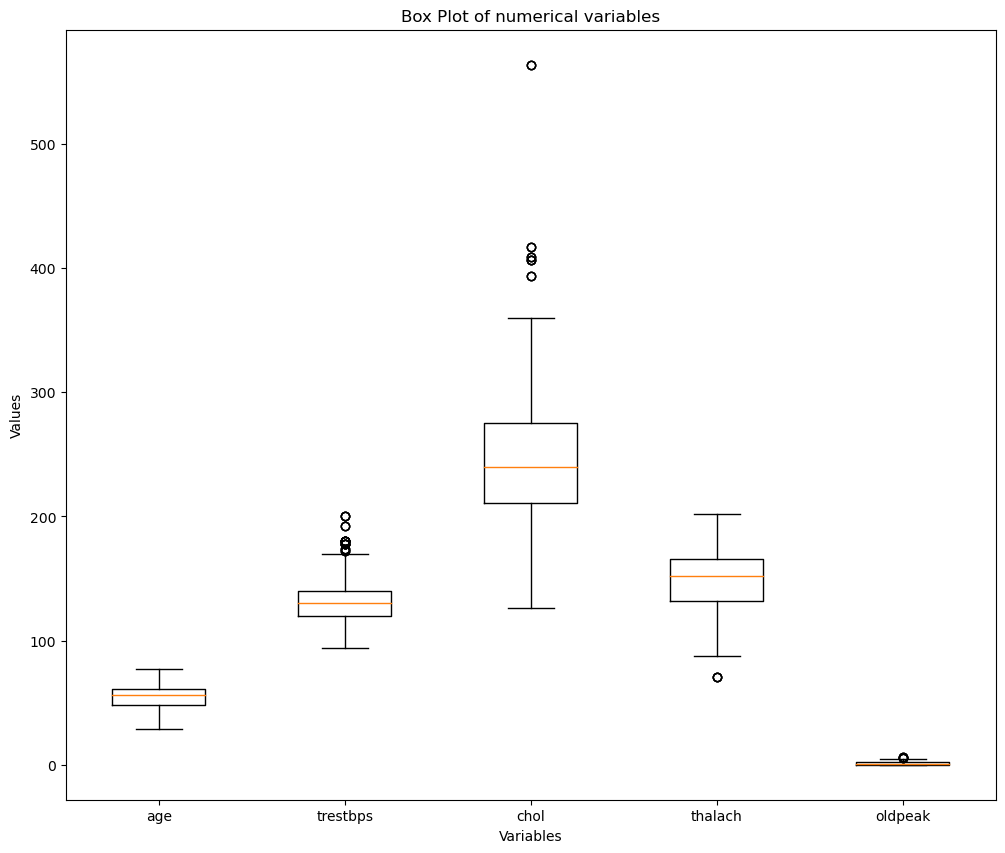

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df=data[['age','trestbps','chol','thalach','oldpeak']]

plt.figure(figsize=(12, 10)) 
plt.boxplot(df,labels=df.columns)
plt.title('Box Plot of numerical variables')  
plt.ylabel('Values')  
plt.xlabel('Variables') 
plt.show()


In [7]:
#detecting outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

outliers= ((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).any(axis=1)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1020    False
1021    False
1022    False
1023    False
1024    False
Length: 1025, dtype: bool

In [8]:
df=df[~outliers]

In [9]:
df

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9
...,...,...,...,...,...
1020,59,140,221,164,0.0
1021,60,125,258,141,2.8
1022,47,110,275,118,1.0
1023,50,110,254,159,0.0


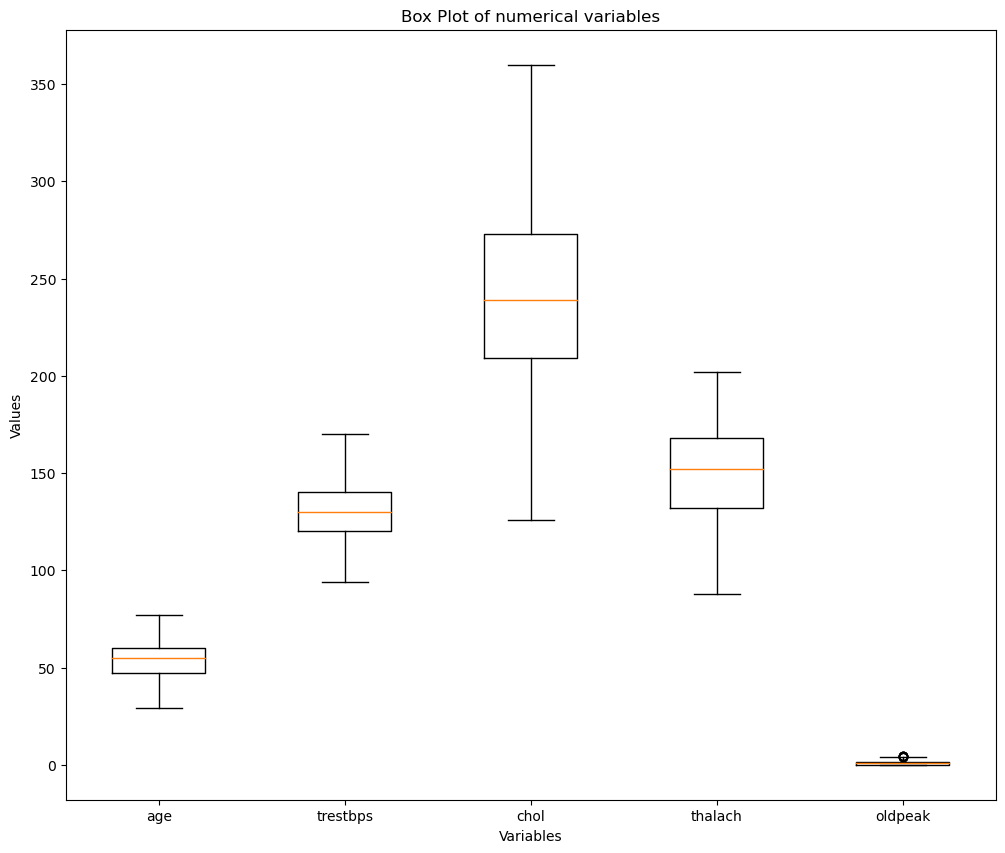

In [10]:
plt.figure(figsize=(12, 10)) 
plt.boxplot(df,labels=df.columns)
plt.title('Box Plot of numerical variables')  
plt.ylabel('Values')  
plt.xlabel('Variables') 
plt.show()

In [11]:
df = df.rename(columns={'age': 'age_new','trestbps':'trestbps_new','chol':'chol_new','thalach':'thalach_new','oldpeak':'oldpeak_new'})
df

,age_new,trestbps_new,chol_new,thalach_new,oldpeak_new
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9
...,...,...,...,...,...
1020,59,140,221,164,0.0
1021,60,125,258,141,2.8
1022,47,110,275,118,1.0
1023,50,110,254,159,0.0


In [12]:
data = pd.concat([data,df], axis=1)

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_new,trestbps_new,chol_new,thalach_new,oldpeak_new
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,52.0,125.0,212.0,168.0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,53.0,140.0,203.0,155.0,3.1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,70.0,145.0,174.0,125.0,2.6
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,61.0,148.0,203.0,161.0,0.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,62.0,138.0,294.0,106.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,59.0,140.0,221.0,164.0,0.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,60.0,125.0,258.0,141.0,2.8
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,47.0,110.0,275.0,118.0,1.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,50.0,110.0,254.0,159.0,0.0


In [14]:
data.drop(['age','trestbps','chol','thalach','oldpeak'],axis=1,inplace=True)

In [15]:
data

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age_new,trestbps_new,chol_new,thalach_new,oldpeak_new
0,1,0,0,1,0,2,2,3,0,52.0,125.0,212.0,168.0,1.0
1,1,0,1,0,1,0,0,3,0,53.0,140.0,203.0,155.0,3.1
2,1,0,0,1,1,0,0,3,0,70.0,145.0,174.0,125.0,2.6
3,1,0,0,1,0,2,1,3,0,61.0,148.0,203.0,161.0,0.0
4,0,0,1,1,0,1,3,2,0,62.0,138.0,294.0,106.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,1,0,1,1,2,0,2,1,59.0,140.0,221.0,164.0,0.0
1021,1,0,0,0,1,1,1,3,0,60.0,125.0,258.0,141.0,2.8
1022,1,0,0,0,1,1,1,2,0,47.0,110.0,275.0,118.0,1.0
1023,0,0,0,0,0,2,0,2,1,50.0,110.0,254.0,159.0,0.0


In [16]:
data.isnull().sum()

sex              0
cp               0
fbs              0
restecg          0
exang            0
slope            0
ca               0
thal             0
target           0
age_new         57
trestbps_new    57
chol_new        57
thalach_new     57
oldpeak_new     57
dtype: int64

In [17]:
data=data.dropna()

In [18]:
data.isnull().sum()

sex             0
cp              0
fbs             0
restecg         0
exang           0
slope           0
ca              0
thal            0
target          0
age_new         0
trestbps_new    0
chol_new        0
thalach_new     0
oldpeak_new     0
dtype: int64

In [19]:
data[:60]

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age_new,trestbps_new,chol_new,thalach_new,oldpeak_new
0,1,0,0,1,0,2,2,3,0,52.0,125.0,212.0,168.0,1.0
1,1,0,1,0,1,0,0,3,0,53.0,140.0,203.0,155.0,3.1
2,1,0,0,1,1,0,0,3,0,70.0,145.0,174.0,125.0,2.6
3,1,0,0,1,0,2,1,3,0,61.0,148.0,203.0,161.0,0.0
4,0,0,1,1,0,1,3,2,0,62.0,138.0,294.0,106.0,1.9
5,0,0,0,0,0,1,0,2,1,58.0,100.0,248.0,122.0,1.0
6,1,0,0,2,0,0,3,1,0,58.0,114.0,318.0,140.0,4.4
7,1,0,0,0,1,1,1,3,0,55.0,160.0,289.0,145.0,0.8
8,1,0,0,0,0,2,0,3,0,46.0,120.0,249.0,144.0,0.8
9,1,0,0,0,1,1,2,2,0,54.0,122.0,286.0,116.0,3.2


In [20]:
re_order = ['age_new','sex','cp','trestbps_new','chol_new','fbs','restecg','thalach_new','exang','oldpeak_new','slope','ca','thal','target']

data= data[re_order]
data

,age_new,sex,cp,trestbps_new,chol_new,fbs,restecg,thalach_new,exang,oldpeak_new,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2,1
1021,60.0,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3,0
1022,47.0,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2,0
1023,50.0,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0,2,1


In [21]:
data = data.rename(columns={'age_new':'age','trestbps_new':'trestbps','chol_new':'chol','thalach_new':'thalach','oldpeak_new':'oldpeak'})
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2,1
1021,60.0,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3,0
1022,47.0,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2,0
1023,50.0,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0,2,1


In [22]:
data['age'] = data['age'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)
data['chol'] = data['chol'].astype(int)
data['thalach'] = data['thalach'].astype(int)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [23]:
data.to_csv('preprocessed_data.csv', index=False)

# Importing the preprocesed dataset

In [24]:
data=pd.read_csv('preprocessed_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
964,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
965,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
966,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Exploratary Data Analysis (EDA) 

In [25]:
#summary of the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,54.073347,0.715909,0.960744,129.891529,242.448347,0.140496,0.530992,149.466942,0.327479,1.000310,1.410124,0.747934,2.304752,0.524793
std,9.127036,0.451213,1.029306,15.323725,45.264264,0.347680,0.521582,22.682671,0.469536,1.072853,0.605200,1.025273,0.622815,0.499643
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


# Univariate Analysis

## Numerical variables

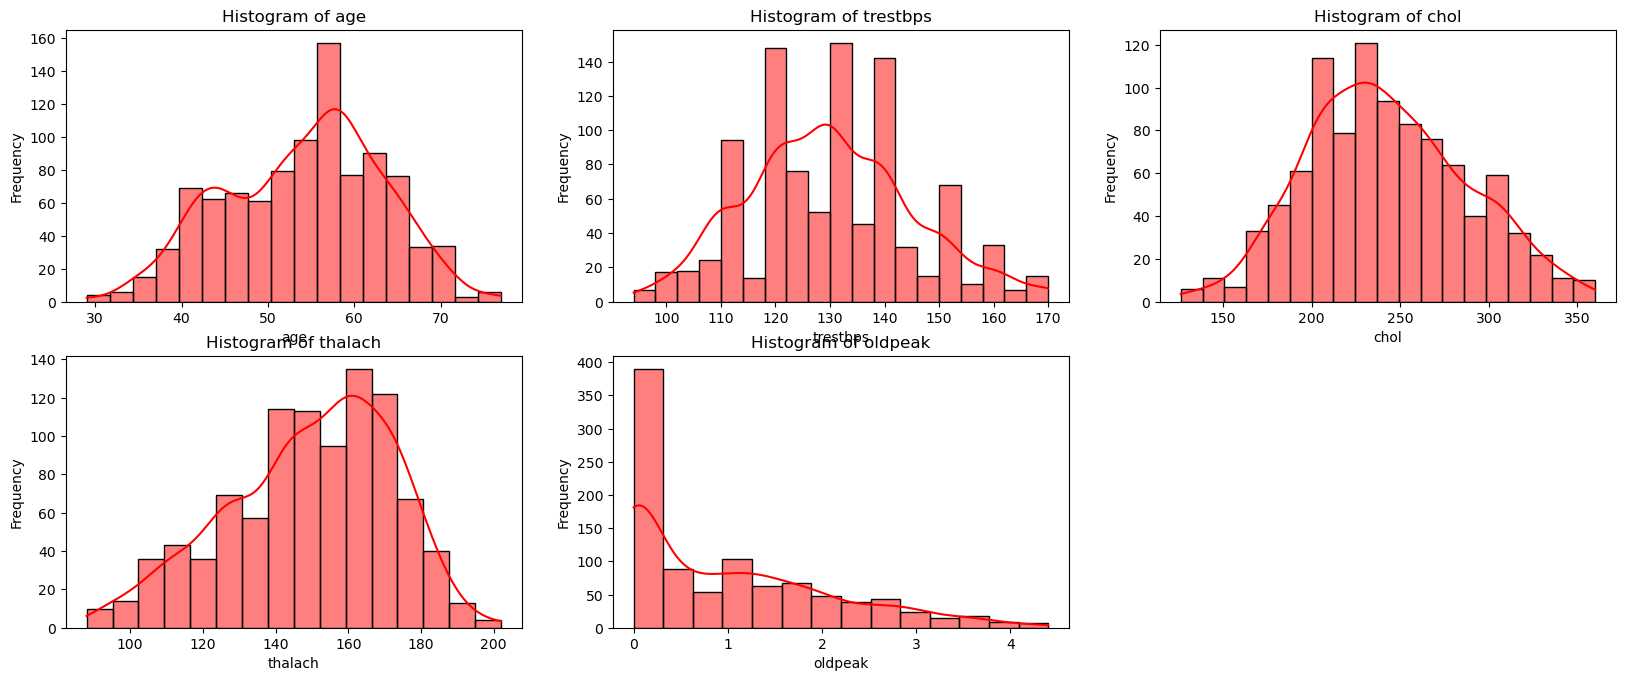

In [26]:
import seaborn as sns
numerical_columns = data[['age','trestbps','chol','thalach','oldpeak']]

plt.figure(figsize=(20,12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True, color='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

# Categorical variables

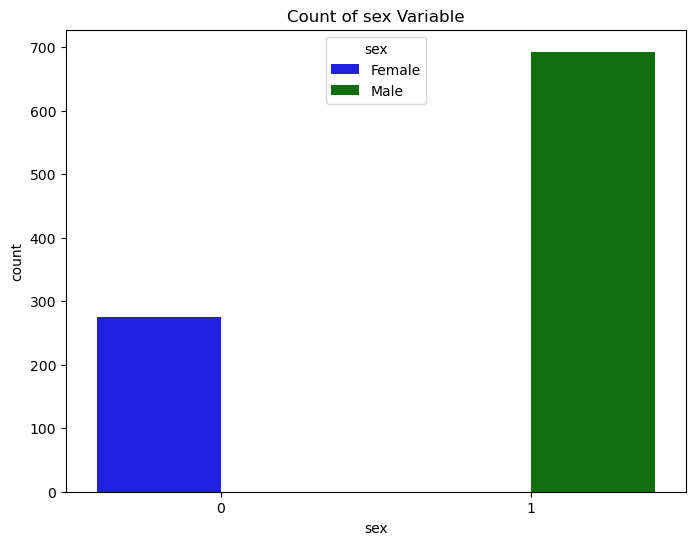

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='sex', hue='sex', palette=['blue','green'])
plt.title('Count of sex Variable')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend(title='sex', loc='upper center', labels=['Female', 'Male'])
plt.show()


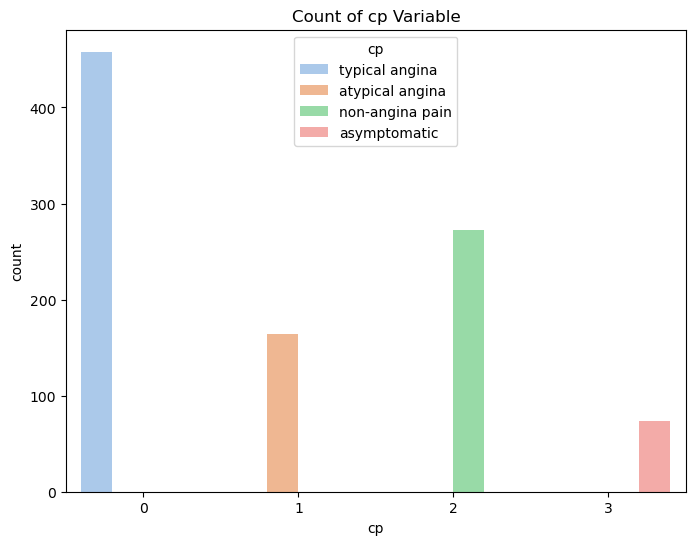

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='cp', hue='cp', palette='pastel')
plt.title('Count of cp Variable')
plt.xlabel('cp')
plt.ylabel('count')
plt.legend(title='cp', loc='upper center', labels=['typical angina','atypical angina','non-angina pain','asymptomatic'])
plt.show()

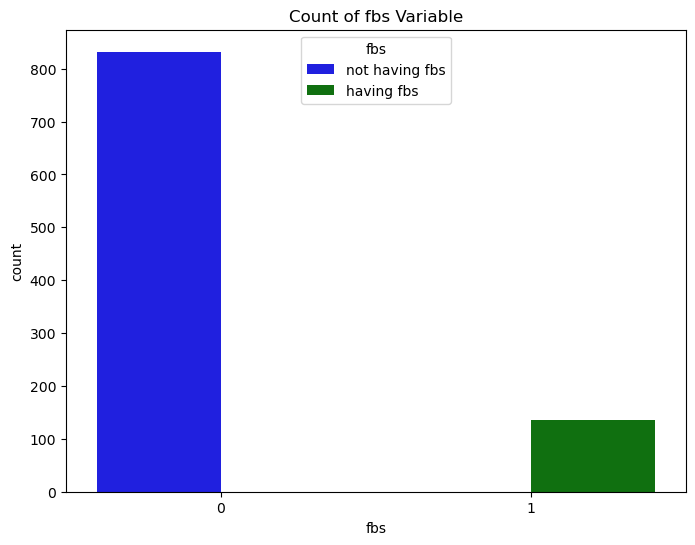

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='fbs', hue='fbs', palette=['blue','green'])
plt.title('Count of fbs Variable')
plt.xlabel('fbs')
plt.ylabel('count')
plt.legend(title='fbs', loc='upper center', labels=['not having fbs','having fbs'])
plt.show()

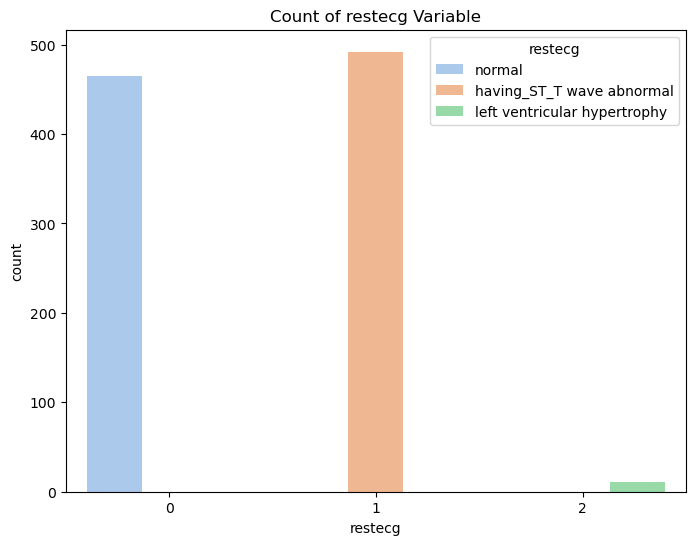

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='restecg', hue='restecg', palette='pastel')
plt.title('Count of restecg Variable')
plt.xlabel('restecg')
plt.ylabel('count')
plt.legend(title='restecg', loc='upper right', labels=['normal','having_ST_T wave abnormal','left ventricular hypertrophy'])
plt.show()

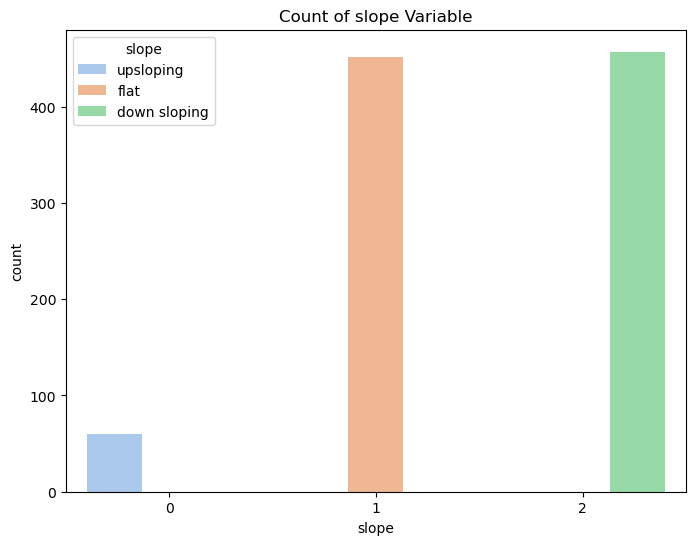

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='slope', hue='slope', palette='pastel')
plt.title('Count of slope Variable')
plt.xlabel('slope')
plt.ylabel('count')
plt.legend(title='slope', loc='upper left', labels=['upsloping','flat','down sloping'])
plt.show()

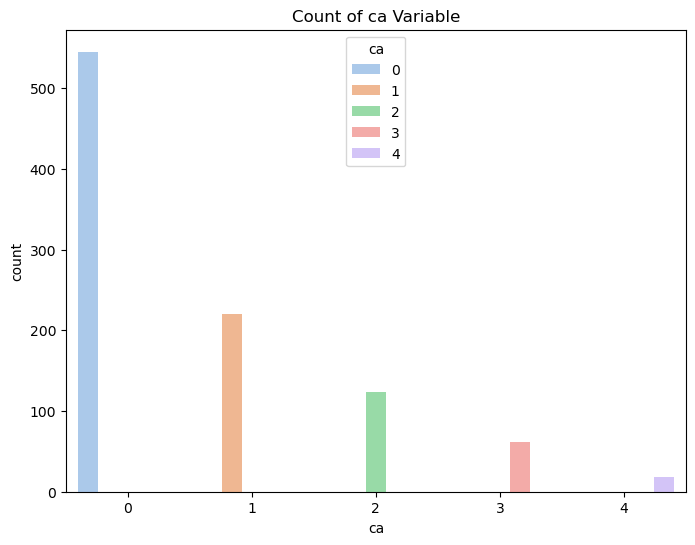

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='ca', hue='ca', palette='pastel')
plt.title('Count of ca Variable')
plt.xlabel('ca')
plt.ylabel('count')
plt.legend(title='ca', loc='upper center')
plt.show()

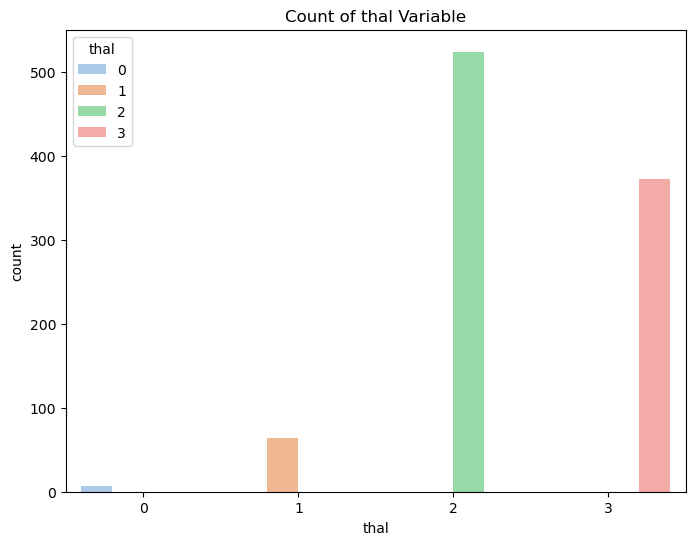

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='thal', hue='thal', palette='pastel')
plt.title('Count of thal Variable')
plt.xlabel('thal')
plt.ylabel('count')
plt.legend(title='thal', loc='upper left')
plt.show()

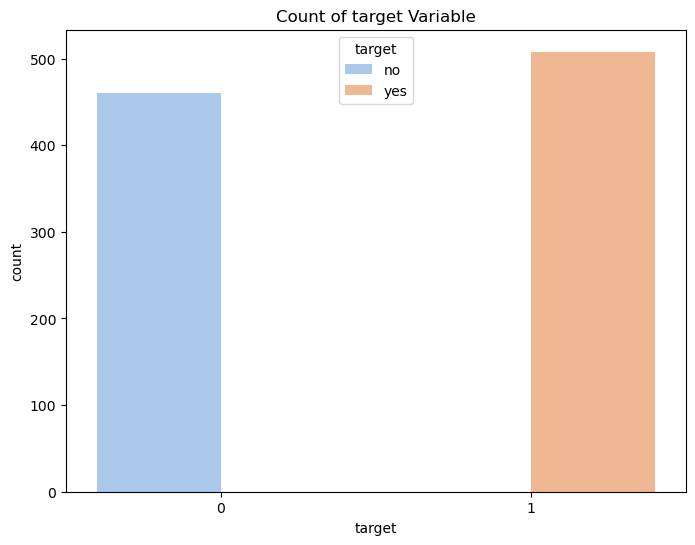

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='target', hue='target', palette='pastel')
plt.title('Count of target Variable')
plt.xlabel('target')
plt.ylabel('count')
plt.legend(title='target', loc='upper center', labels=['no','yes'])
plt.show()

# Bivariate Analysis

# Numerical vs Numerical

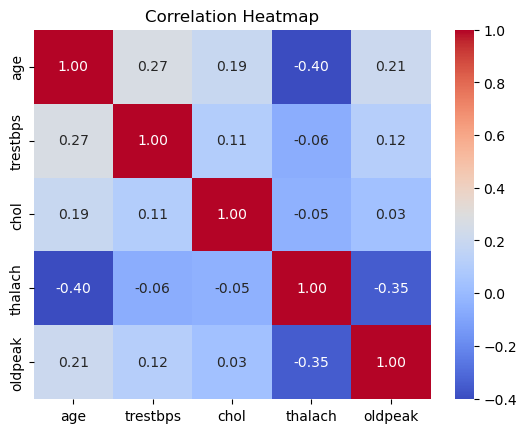

In [35]:
numerical_cols = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Numerical vs Categorical

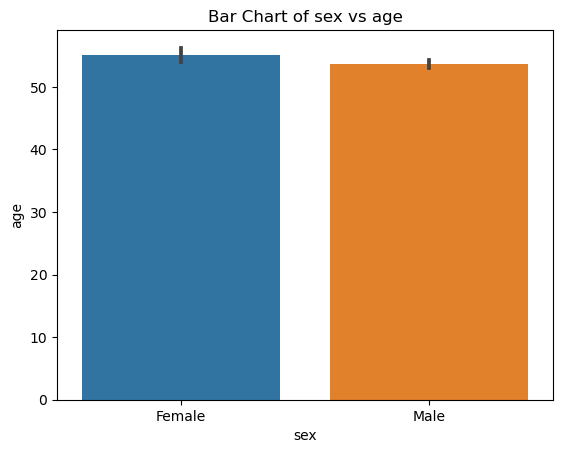

In [36]:
sns.barplot(data=data, x='sex', y='age')
plt.title('Bar Chart of sex vs age')
plt.xlabel('sex')
plt.ylabel('age')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  
plt.show()

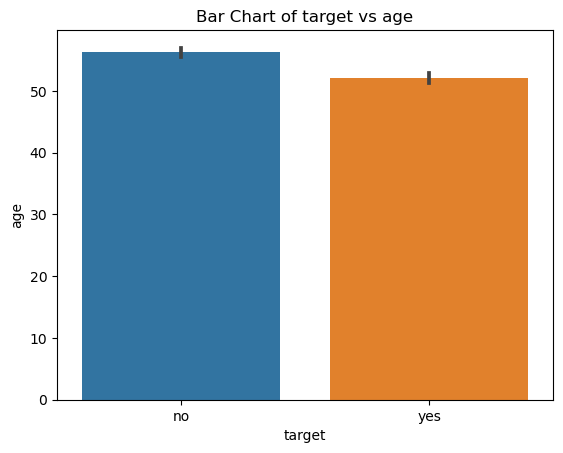

In [37]:
sns.barplot(data=data, x='target', y='age')
plt.title('Bar Chart of target vs age')
plt.xlabel('target')
plt.ylabel('age')
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])  
plt.show()

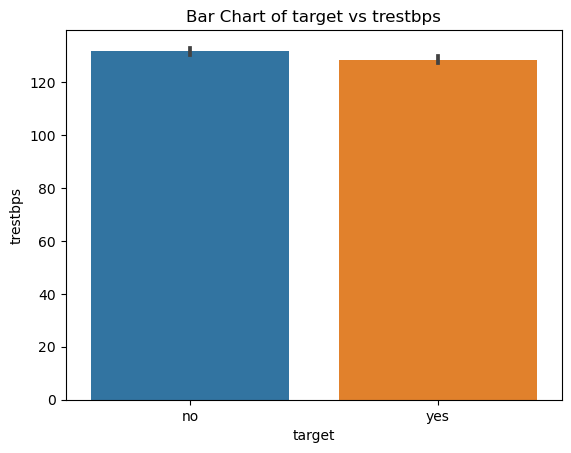

In [38]:
sns.barplot(data=data, x='target', y='trestbps')
plt.title('Bar Chart of target vs trestbps')
plt.xlabel('target')
plt.ylabel('trestbps')
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])  
plt.show()

# Categorical vs Categorical

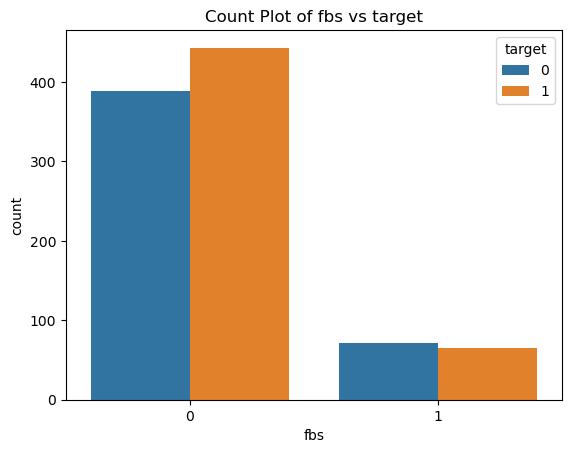

In [39]:
sns.countplot(data=data, x='fbs', hue='target')
plt.title('Count Plot of fbs vs target')
plt.xlabel('fbs')
plt.ylabel('count')
plt.legend(title='target')
plt.show()

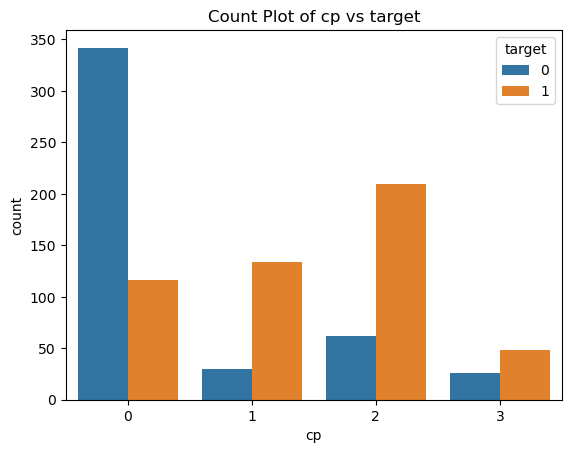

In [40]:
sns.countplot(data=data, x='cp', hue='target')
plt.title('Count Plot of cp vs target')
plt.xlabel('cp')
plt.ylabel('count')
plt.legend(title='target')
plt.show()


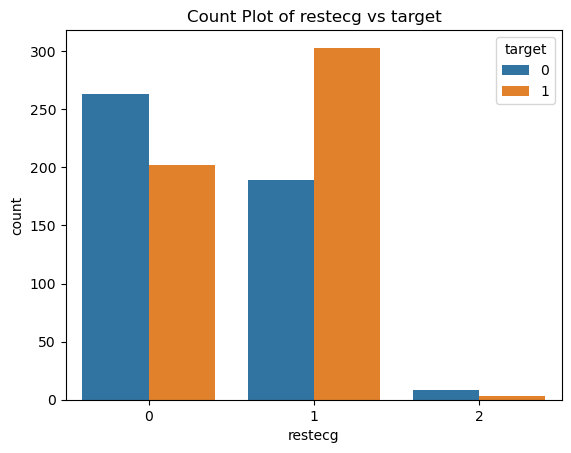

In [41]:
sns.countplot(data=data, x='restecg', hue='target')
plt.title('Count Plot of restecg vs target')
plt.xlabel('restecg')
plt.ylabel('count')
plt.legend(title='target')
plt.show()

# Statistical Analysis

# Identifying relationship between numerical vs numerical

In [42]:
# H0- There is no significanct difference between the age and thalach variables
# H1- There is a significant difference between the age and thalach variables

#alpha=0.05
from scipy import stats

t_statistic, p_value = stats.ttest_ind(data['age'], data['thalach'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -121.38824569684586
P-value: 0.0


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the age and thalach variables.

In [43]:
# H0- There is no significanct difference between the age and chol variables
# H1- There is a significant difference between the age and chol variables

#alpha=0.05
from scipy import stats

t_statistic, p_value = stats.ttest_ind(data['age'], data['chol'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -126.92624086723133
P-value: 0.0


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the age and chol variables.

In [44]:
# H0- There is no significanct difference between the age and trestbps variables
# H1- There is a significant difference between the age and trestbps variables

#alpha=0.05
from scipy import stats

t_statistic, p_value = stats.ttest_ind(data['age'], data['trestbps'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -132.25618983537555
P-value: 0.0


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the age and trestbps variables.

In [45]:
# H0- There is no significanct difference between the chol and trestbps variables
# H1- There is a significant difference between the chol and trestbps variables

#alpha=0.05
from scipy import stats

t_statistic, p_value = stats.ttest_ind(data['chol'], data['trestbps'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 73.28123831189451
P-value: 0.0


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the chol and trestbps variables.

# Identifying relationship between numerical vs categorical

In [46]:
# H0- There is no significanct difference between the age and fbs variables
# H1- There is a significant difference between the age and fbs variables

#alpha=0.05
from scipy import stats

a = data[data['fbs']==0]['age']
b = data[data['fbs']==1]['age']

f_statistic, p_value = stats.f_oneway(a,b)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 11.513383711296209
P-value: 0.0007190317710372662


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the age and fbs variables.

In [47]:
# H0- There is no significanct difference between the age and target variables
# H1- There is a significant difference between the age and target variables

#alpha=0.05
from scipy import stats

a = data[data['target']==0]['age']
b = data[data['target']==1]['age']

f_statistic, p_value = stats.f_oneway(a,b)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 53.39709373550737
P-value: 5.702655984191439e-13


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the age and target variables.

In [48]:
# H0- There is no significanct difference between the trestbps and target variables
# H1- There is a significant difference between the trestbps and target variables

#alpha=0.05
from scipy import stats

a = data[data['target']==0]['trestbps']
b = data[data['target']==1]['trestbps']

f_statistic, p_value = stats.f_oneway(a,b)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 10.755009985642246
P-value: 0.0010771326612174677


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the trestbps and target variables.

In [49]:
# H0- There is no significanct difference between the chol and target variables
# H1- There is a significant difference between the chol and target variables

#alpha=0.05
from scipy import stats

a = data[data['target']==0]['chol']
b = data[data['target']==1]['chol']

f_statistic, p_value = stats.f_oneway(a,b)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 17.481809883299384
P-value: 3.164180710668812e-05


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the chol and target variables.

In [50]:
# H0- There is no significanct difference between the thalach and target variables
# H1- There is a significant difference between the thalach and target variables

#alpha=0.05
from scipy import stats

a = data[data['target']==0]['thalach']
b = data[data['target']==1]['thalach']

f_statistic, p_value = stats.f_oneway(a,b)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 215.65172520072178
P-value: 3.2229021107950706e-44


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the thalach and target variables.

In [51]:
# H0- There is no significanct difference between the oldpeak and target variables
# H1- There is a significant difference between the oldpeak and target variables

#alpha=0.05
from scipy import stats

a = data[data['target']==0]['oldpeak']
b = data[data['target']==1]['oldpeak']

f_statistic, p_value = stats.f_oneway(a,b)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 245.2802767664218
P-value: 1.95509984627003e-49


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the oldpeak and target variables.

In [52]:
# H0- There is no significanct difference between the chol and restecg variables
# H1- There is a significant difference between the chol and restecg variables

#alpha=0.05
from scipy import stats

a = data[data['restecg']==0]['chol']
b = data[data['restecg']==1]['chol']
c = data[data['restecg']==2]['chol']
f_statistic, p_value = stats.f_oneway(a,b,c)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 8.354875953313625
P-value: 0.0002526855849998887


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the chol and restecg variables.

# Identifying relationship between categorical vs categorical

In [53]:
# H0- There is no significanct difference between the exang and ca variables
# H1- There is a significant difference between the exang and ca variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['exang'], data['ca'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 50.929762300055955
p-value: 2.3089396527740636e-10


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the exang and ca variables.

In [54]:
# H0- There is no significanct difference between the sex and target variables
# H1- There is a significant difference between the sex and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['sex'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 97.48157619428007
p-value: 5.435971783244131e-23


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the sex and target variables.

In [55]:
# H0- There is no significanct difference between the cp and target variables
# H1- There is a significant difference between the cp and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['cp'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 262.8068594193315
p-value: 1.1107521868613481e-56


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the cp and target variables.

In [56]:
# H0- There is no significanct difference between the fbs and target variables
# H1- There is a significant difference between the fbs and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['fbs'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 1.1827684114951635
p-value: 0.27679312182966676


Since the p-value is higher than the alpha value of 0.05 we have to accept the null hypothesis. This means that there is no significant difference between the fbs and target variables.

In [57]:
# H0- There is no significanct difference between the restecg and target variables
# H1- There is a significant difference between the restecg and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['restecg'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 34.39391609435747
p-value: 3.3998207062427004e-08


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the restecg and target variables.

In [58]:
# H0- There is no significanct difference between the exang and target variables
# H1- There is a significant difference between the exang and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['exang'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 180.12346747257908
p-value: 4.554727604113628e-41


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the exang and target variables.

In [59]:
# H0- There is no significanct difference between the slope and target variables
# H1- There is a significant difference between the slope and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['slope'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 139.50146434183944
p-value: 5.100842447616183e-31


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the slope and target variables.

In [60]:
# H0- There is no significanct difference between the ca and target variables
# H1- There is a significant difference between the ca and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['ca'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)


Chi-squared statistic: 250.2780633716478
p-value: 5.670985814186916e-53


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the ca and target variables.

In [61]:
# H0- There is no significanct difference between the thal and target variables
# H1- There is a significant difference between the thal and target variables

#alpha=0.05
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['thal'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

Chi-squared statistic: 277.1292187088963
p-value: 8.851048373174561e-60


Since the p-value is less than the alpha value of 0.05 we have to reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference between the thal and target variables.

In [62]:
data.drop('fbs',axis=1,inplace=True)
data

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,59,1,1,140,221,1,164,1,0.0,2,0,2,1
964,60,1,0,125,258,0,141,1,2.8,1,1,3,0
965,47,1,0,110,275,0,118,1,1.0,1,1,2,0
966,50,0,0,110,254,0,159,0,0.0,2,0,2,1


In [68]:
data.to_csv('data.csv', index=False)